# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from datetime import date

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [51]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [52]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
unit = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&units=" + unit + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

datadate = date.today()

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | leningradskiy
Processing Record 2 of Set 1 | coquimbo
Processing Record 3 of Set 1 | landau
Processing Record 4 of Set 1 | alta floresta
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | fort nelson
Processing Record 7 of Set 1 | yulara
Processing Record 8 of Set 1 | mehamn
Processing Record 9 of Set 1 | berlevag
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | clyde river
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | grenada
Processing Record 15 of Set 1 | hithadhoo
Processing Record 16 of Set 1 | tuktoyaktuk
Processing Record 17 of Set 1 | qaanaaq
Processing Record 18 of Set 1 | swellendam
Processing Record 19 of Set 1 | san jose
Processing Record 20 of Set 1 | codrington
Processing Record 21 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 22 of Set 1 | albany
Processi

In [53]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [54]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,leningradskiy,69.3833,178.4167,-12.89,93,100,2.31,RU,1680313521
1,coquimbo,-29.9533,-71.3436,15.85,94,0,3.60,CL,1680313522
2,landau,49.2075,8.1133,10.73,73,100,4.02,DE,1680313523
3,alta floresta,-9.8756,-56.0861,22.00,95,85,0.20,BR,1680313525
4,bluff,-46.6000,168.3333,16.27,71,10,1.03,NZ,1680313526


In [55]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [56]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,leningradskiy,69.3833,178.4167,-12.89,93,100,2.31,RU,1680313521
1,coquimbo,-29.9533,-71.3436,15.85,94,0,3.60,CL,1680313522
2,landau,49.2075,8.1133,10.73,73,100,4.02,DE,1680313523
3,alta floresta,-9.8756,-56.0861,22.00,95,85,0.20,BR,1680313525
4,bluff,-46.6000,168.3333,16.27,71,10,1.03,NZ,1680313526


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

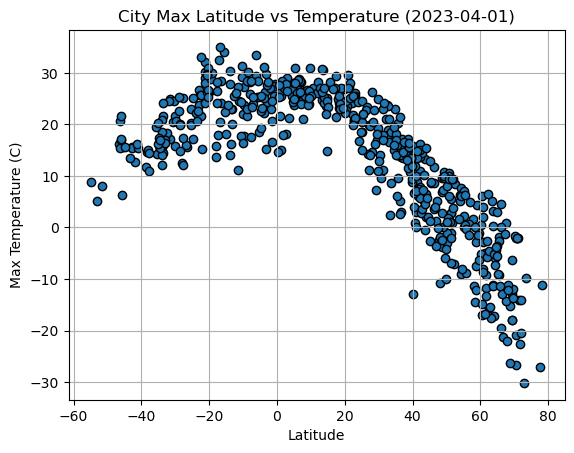

In [57]:
# Build scatter plot for latitude vs. temperature
lati = city_data_df['Lat']
temp = city_data_df['Max Temp']
plt.scatter(lati, temp, marker='o', edgecolor='black', linewidth=1)

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs Temperature ({datadate})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

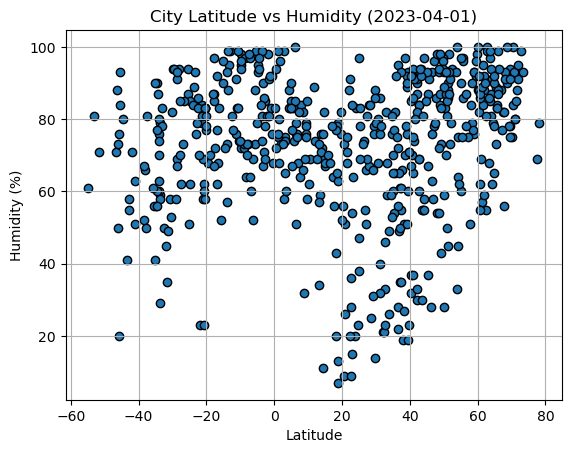

In [58]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df['Humidity']
plt.scatter(lati, humidity, marker='o', edgecolor='black', linewidth=1)

# Incorporate the other graph properties
plt.title(f"City Latitude vs Humidity ({datadate})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

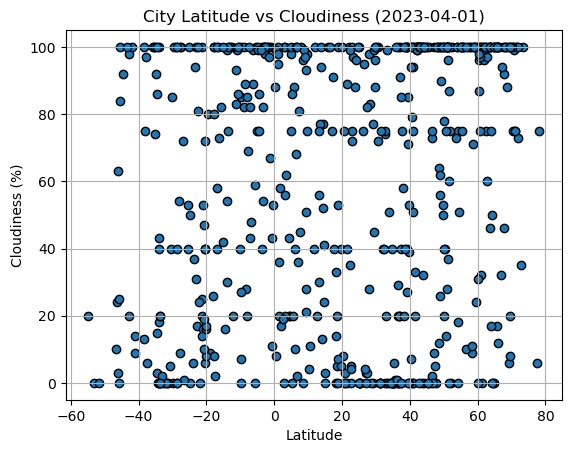

In [59]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df['Cloudiness']
plt.scatter(lati, cloudiness, marker='o', edgecolor='black', linewidth=1)

# Incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness ({datadate})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

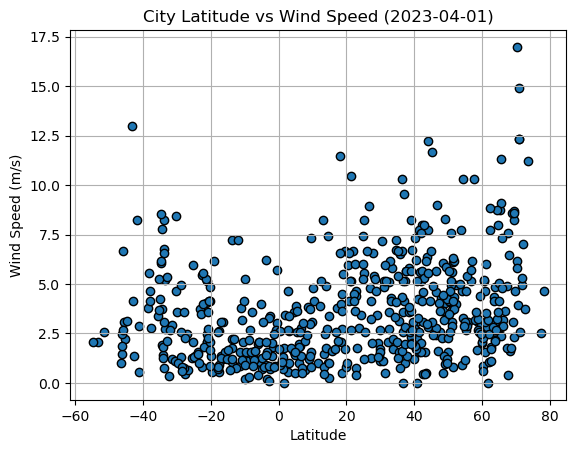

In [74]:
# Build the scatter plots for latitude vs. wind speed
windspeed = city_data_df['Wind Speed']
plt.scatter(lati, windspeed, marker='o', edgecolor='black', linewidth=1)

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (2023-04-01)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [199]:
# Define a function to create Linear Regression plots
def lineregressplot(xvalues,yvalues):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues,yvalues)
    reg_values = xvalues * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    plt.scatter(xvalues,yvalues, marker='o', edgecolor='black', linewidth=1)
    plt.plot(xvalues,reg_values,"r-")
    plt.xlabel("Latitude")
    plt.ylabel(yvalues.name)
    if xvalues.min() == 0:
        plt.text(xvalues.min()+5,yvalues.max(),line_eq,fontsize=15,color="red")
    else: 
        plt.text(xvalues.max()+5,yvalues.min(),line_eq,fontsize=15,color="red")
    print(f"The r-value is: {rvalue**2}")

    plt.show()


In [81]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df['Lat'] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,leningradskiy,69.3833,178.4167,-12.89,93,100,2.31,RU,1680313521
2,landau,49.2075,8.1133,10.73,73,100,4.02,DE,1680313523
5,fort nelson,58.8053,-122.7002,-2.81,76,100,3.09,CA,1680313527
7,mehamn,71.0357,27.8492,-2.03,80,75,12.35,NO,1680313529
8,berlevag,70.8578,29.0864,-2.00,93,100,14.92,NO,1680313531


In [82]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df['Lat'] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,coquimbo,-29.9533,-71.3436,15.85,94,0,3.60,CL,1680313522
3,alta floresta,-9.8756,-56.0861,22.00,95,85,0.20,BR,1680313525
4,bluff,-46.6000,168.3333,16.27,71,10,1.03,NZ,1680313526
6,yulara,-25.2406,130.9889,23.08,51,100,5.95,AU,1680313528
9,mataura,-46.1927,168.8643,20.62,50,3,1.47,NZ,1680313532


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.8018481940262088


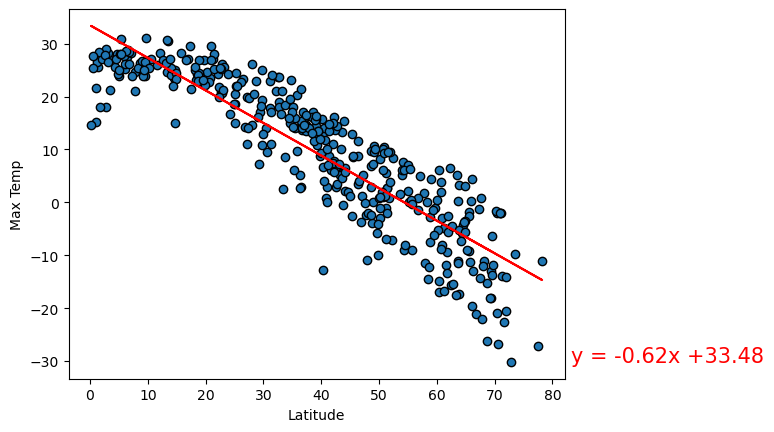

In [200]:
# Linear regression on Northern Hemisphere
northlat = northern_hemi_df['Lat']
northTemp = northern_hemi_df['Max Temp']

lineregressplot(northlat,northTemp)

The r-value is: 0.3701316852485674


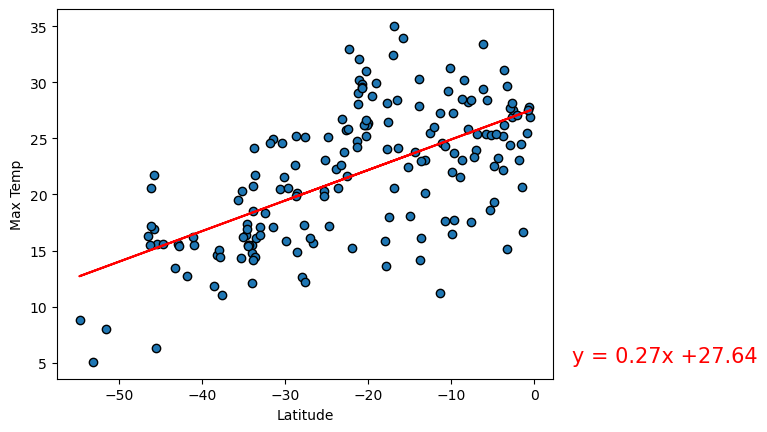

In [201]:
# Linear regression on Southern Hemisphere
southlat = southern_hemi_df['Lat']
southTemp = southern_hemi_df['Max Temp']

lineregressplot(southlat,southTemp)

**Discussion about the linear relationship:**

In the northern hemisphere, the regression display a negative correlation. The further the location to the equator, the temperature becomes colder.

In the northern hemisphere, the regression display a positive correlation. The nearer the location to the equator, the temperature becomes hotter.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.07851336853438874


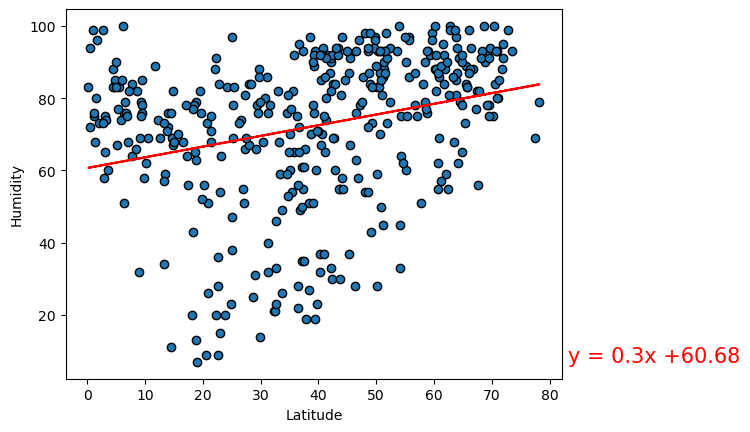

In [202]:
# Northern Hemisphere
northHumi = northern_hemi_df['Humidity']

lineregressplot(northlat,northHumi)

The r-value is: 0.14759888310333974


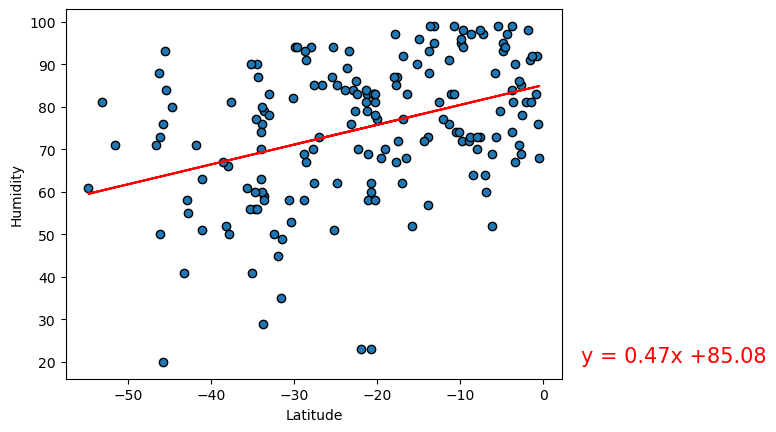

In [203]:
# Southern Hemisphere
southHumi = southern_hemi_df['Humidity']

lineregressplot(southlat,southHumi)

**Discussion about the linear relationship:** 

Both Northern and Southern hemisphere does not show much of a correlation between the datasets.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.04893075813755277


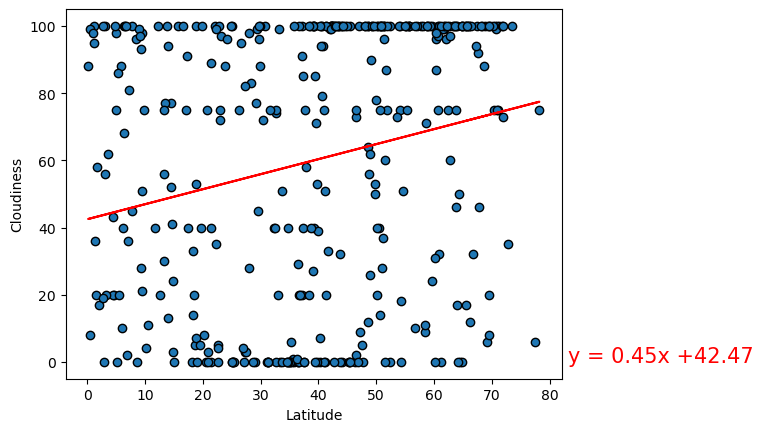

In [204]:
# Northern Hemisphere
northCloud = northern_hemi_df['Cloudiness']

lineregressplot(northlat,northCloud)

The r-value is: 0.11820575406129695


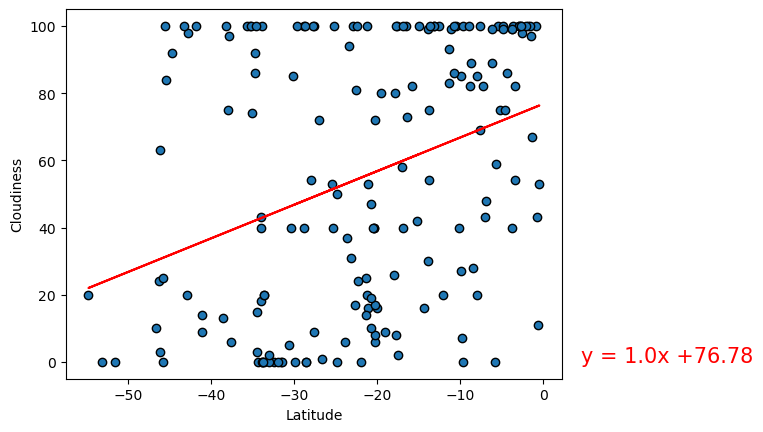

In [205]:
# Southern Hemisphere
southCloud = southern_hemi_df['Cloudiness']

lineregressplot(southlat,southCloud)

**Discussion about the linear relationship:**

Both Northern and Southern hemisphere does not show much of a correlation between the datasets.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.08068654458363467


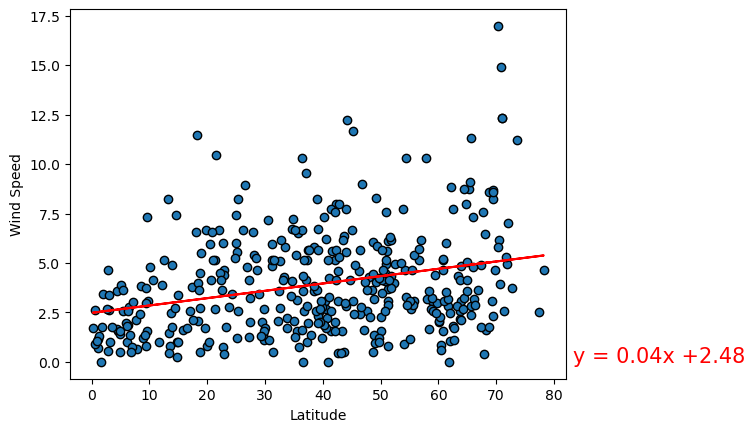

In [207]:
# Northern Hemisphere
northWind = northern_hemi_df['Wind Speed']

lineregressplot(northlat,northWind)

The r-value is: 0.09296771655688237


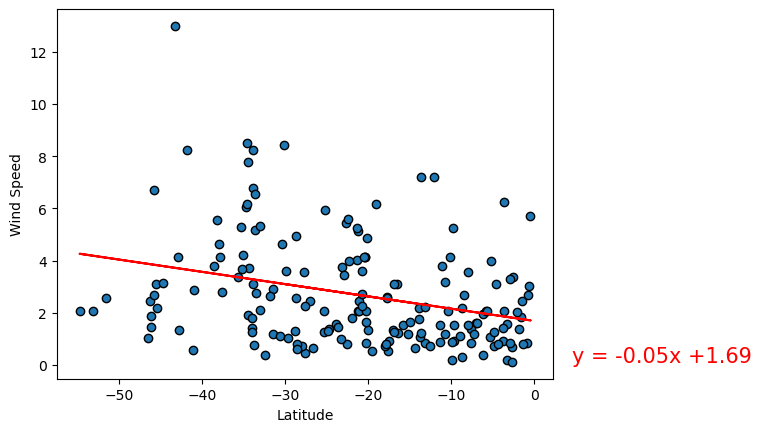

In [208]:
# Southern Hemisphere
southWind = southern_hemi_df['Wind Speed']

lineregressplot(southlat,southWind)

**Discussion about the linear relationship:**

Both Northern and Southern hemisphere does not show much of a correlation between the datasets.